In [2]:
import requests
import json
import os

ID_ACTIVO = "bitcoin"
URL_ENDPOINT = f"https://api.coingecko.com/api/v3/coins/{ID_ACTIVO}/market_chart"
NOMBRE_ARCHIVO_CRUDO = f"datos_crudos_{ID_ACTIVO}.json"
print(URL_ENDPOINT)

PARAMETROS = {
    'vs_currency': 'usd',
    'days': '365'
}

def extraer_datos_coingecko():
    print(f"--- Iniciando Fase 1: Extracción de Datos para '{ID_ACTIVO}' ---")
    try:
        print(f"Realizando solicitud a: {URL_ENDPOINT}")
        respuesta = requests.get(URL_ENDPOINT, params=PARAMETROS)
        respuesta.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error: No se pudo conectar a la API de CoinGecko. {e}")
        return

    if respuesta.status_code == 200:
        print("Respuesta recibida con éxito (Código de estado: 200)")
        datos_json = respuesta.json()
        try:
            with open(NOMBRE_ARCHIVO_CRUDO, 'w', encoding='utf-8') as f:
                json.dump(datos_json, f, ensure_ascii=False, indent=4)
            print(f"Datos crudos guardados correctamente en: '{os.path.abspath(NOMBRE_ARCHIVO_CRUDO)}'")
        except IOError as e:
            print(f"Error al escribir en el archivo '{NOMBRE_ARCHIVO_CRUDO}': {e}")
    else:
        print(f"Error: La API devolvió un código de estado inesperado: {respuesta.status_code}")
        print(f"Respuesta: {respuesta.text}")

# --- Llamada a la función ---
extraer_datos_coingecko()

https://api.coingecko.com/api/v3/coins/bitcoin/market_chart
--- Iniciando Fase 1: Extracción de Datos para 'bitcoin' ---
Realizando solicitud a: https://api.coingecko.com/api/v3/coins/bitcoin/market_chart
Respuesta recibida con éxito (Código de estado: 200)
Datos crudos guardados correctamente en: 'c:\Users\fejor\OneDrive\Escritorio\bitcoin\Trabajo-Encargado-LP2\grupo2\bitcoin\datos_crudos_bitcoin.json'


In [3]:
import json
import pandas as pd
from datetime import datetime

with open('datos_crudos_bitcoin.json', 'r', encoding='utf-8') as f:
    datos = json.load(f)

precios = datos['prices']
df_precios = pd.DataFrame(precios, columns=['timestamp_ms', 'price_usd'])
df_precios['date'] = df_precios['timestamp_ms'].apply(lambda x: datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d'))
df_precios = df_precios[['date', 'price_usd']]

# Muestra las primeras filas para verificar
print(df_precios.head())

# --- Guardar como CSV ---
df_precios.to_csv('bitcoin_prices.csv', index=False)
print("Archivo 'bitcoin_prices.csv' guardado correctamente.")

         date     price_usd
0  2024-07-05  57189.174124
1  2024-07-06  56739.862851
2  2024-07-07  58230.484154
3  2024-07-08  55880.375378
4  2024-07-09  56665.140734
Archivo 'bitcoin_prices.csv' guardado correctamente.


C:\Users\fejor\AppData\Local\Temp\ipykernel_24188\4177047778.py:10: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df_precios['date'] = df_precios['timestamp_ms'].apply(lambda x: datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d'))


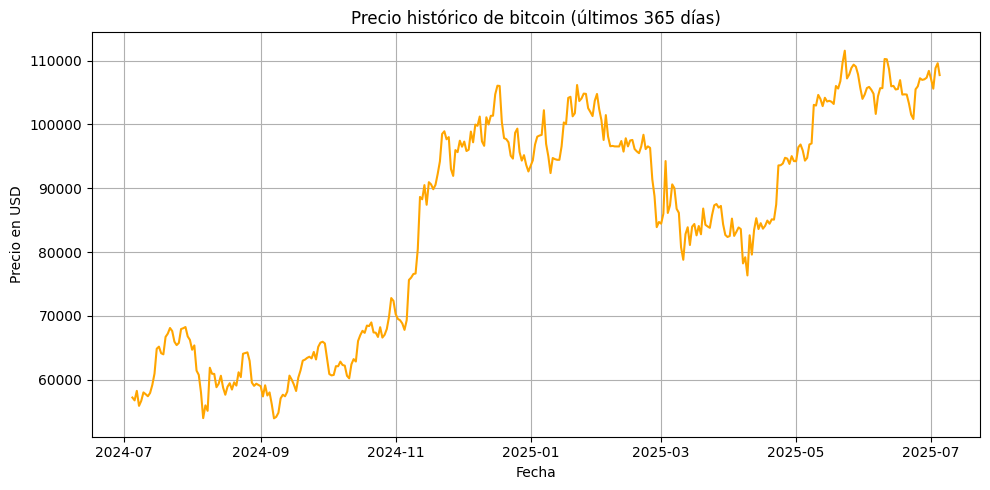

In [5]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# --- Leer el archivo JSON descargado ---
with open('datos_crudos_bitcoin.json', 'r', encoding='utf-8') as f:
    datos = json.load(f)

# --- Procesar precios ---
precios = datos['prices']
df_precios = pd.DataFrame(precios, columns=['timestamp_ms', 'price_usd'])

# Convertir timestamp de ms a fecha legible
df_precios['date'] = pd.to_datetime(df_precios['timestamp_ms'], unit='ms')

# Reordenar columnas
df_precios = df_precios[['date', 'price_usd']]

# --- Graficar ---
plt.figure(figsize=(10,5))
plt.plot(df_precios['date'], df_precios['price_usd'], color='orange')
plt.title('Precio histórico de bitcoin (últimos 365 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.tight_layout()
plt.show()
